# Clustering vía Propagación de Afinidad

## Propagación de afinidades (Affinity Propagation)

La **propagación de afinidades** es un algoritmo de **clustering** que agrupa datos basándose en las similitudes entre ellos. A diferencia de otros métodos como el **k-means**, no necesitas especificar de antemano cuántos grupos deseas (aunque puedes influir en la cantidad ajustando ciertos parámetros).

### ¿Cómo funciona?

1. **Similitudes**: Cada punto en los datos "evalúa" qué tan parecido es a los demás. Esto se hace mediante una matriz de similitud, que puede basarse en cosas como la distancia euclidiana o correlación.

2. **Mensajes de comunicación**: Los puntos intercambian dos tipos de mensajes:
   - **Responsabilidad**: Un punto dice a otro qué tan adecuado sería para ser su "ejemplo representativo" (o centroide).
   - **Disponibilidad**: Un punto evalúa si está dispuesto a ser el "ejemplo representativo" considerando las responsabilidades de los demás.

3. **Elección de ejemplos representativos**: Mediante iteraciones, el algoritmo decide qué puntos se convierten en los "ejemplos representativos" o **exemplars**. Estos son los centros del cluster.

4. **Asignación a clusters**: Cada punto se asocia al ejemplo representativo más cercano.

### Ventajas

- No requiere especificar el número de clusters.
- Puede identificar clusters de formas y tamaños diferentes.
- Es útil cuando tienes datos con relaciones claras de similitud.

### Ejemplo visual

Imagina que en una sala todos se preguntan mutuamente quién sería el mejor representante del grupo según ciertas afinidades (como gustos musicales). A través de esta comunicación, un grupo decide automáticamente quiénes serán los líderes y cómo se agruparán las personas alrededor de ellos. 

### Ejemplo técnico simple explicado

Supongamos que tenemos **5 puntos**: $A, B, C, D, E$. Queremos agruparlos en clusters usando **propagación de afinidades**. Para ello, seguimos estos pasos:

---

#### **1. Calculamos similitudes entre puntos**

La similitud mide qué tan parecidos son dos puntos. Por ejemplo, podríamos usar la distancia negativa (valores más grandes = más parecidos). 

Supongamos que la matriz de similitud es:

$S =
\begin{bmatrix}
-10 & -2 & -4 & -6 & -8 \\ 
-2  & -10 & -3 & -7 & -9 \\ 
-4  & -3  & -10 & -5 & -1 \\ 
-6  & -7  & -5  & -10 & -3 \\ 
-8  & -9  & -1  & -3  & -10 \\
\end{bmatrix}$

Aquí:
- $S(A, B) = -2$: El punto $A$ es muy parecido a $B$.
- $S(A, E) = -8$: $A$ es menos parecido a $E$.

---

#### **2. Responsabilidad (\(R\))**

Cada punto empieza a decidir cuál podría ser su representante. $R(A, B)$ mide qué tan bueno sería que $B$ sea representante de $A$. Se calcula comparando $S(A, B)$ con los demás.

Por ejemplo:
- Si $A$ evalúa a $B$ como representante, compara la similitud con $B$ ($S(A, B)$) frente a todos los demás puntos para quedarse con la diferencia más alta.

---

#### **3. Disponibilidad ($A$)**

Ahora, $B$ decide si está dispuesto a ser representante. \(B\) suma los mensajes de otros puntos que creen que $B$ sería un buen representante.

Por ejemplo:
- Si muchos puntos quieren que $B$ sea su representante, \(B\) lo evalúa considerando si tiene capacidad para ser representante o si debería ceder.

---

#### **4. Iteraciones**

Los puntos intercambian estos mensajes ($R$ y $A$) durante varias rondas hasta llegar a un consenso. Al final, los puntos con los valores más fuertes de $R + A$ se convierten en representantes.

---

#### **5. Resultado**

Supongamos que el algoritmo decide que $B$ y $E$ son los representantes finales. Entonces:
- $A$ y $C$ se agrupan con $B$.
- $D$ se agrupa con $E$.

El resultado final son **2 clusters**: $({A, B, C})$ y $({D, E})$.


## Ejemplo en Python

### Affinity Propagation: Contexto y Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation

In [6]:
datos = {"alan" : [2, 4], # ahorro: $20.000, score o evaluacion crediticia: 4 (del 1 al 10)
         "alberto" : [3, 3],
         "alex" : [3, 2], 
         "zelda" : [7, 6], 
         "zoila" : [6, 7], 
         "zulema" : [6, 8]}

personas = set(datos.keys())
datos = pd.DataFrame(datos, index=["ahorro", "evaluacion"])
datos

,alan,alberto,alex,zelda,zoila,zulema
ahorro,2,3,3,7,6,6
evaluacion,4,3,2,6,7,8


In [7]:
datos.T

,ahorro,evaluacion
alan,2,4
alberto,3,3
alex,3,2
zelda,7,6
zoila,6,7
zulema,6,8


### Visualización de Datos

Aquí realizamos una representación visual de los datos, sabiendo de antemano los clúster que se formarán, simplemente para tener una idea de cómo quedarán dichos clústers antes de comenzar a armarlos.

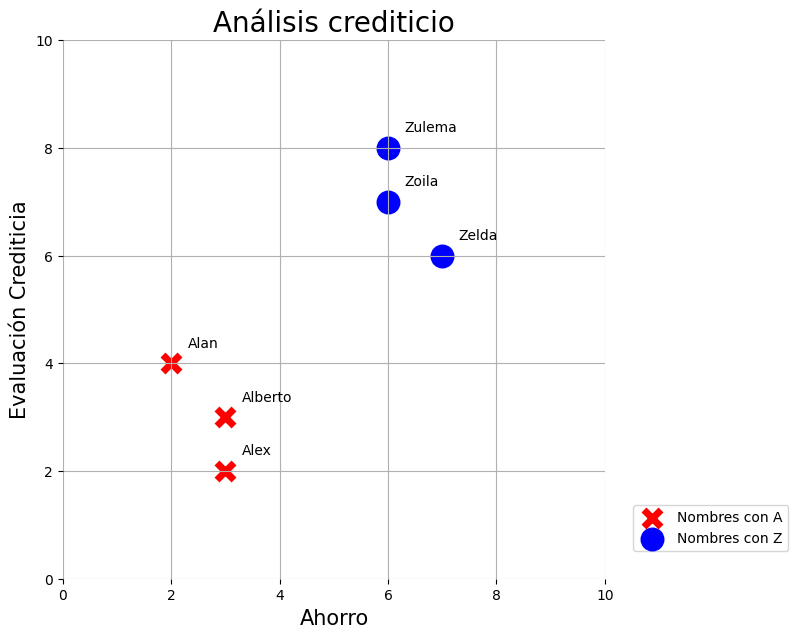

In [8]:
plt.figure(figsize=(7, 7))

plt.title("Análisis crediticio", fontsize=20)

plt.scatter(
    datos.T[0:3]["ahorro"],
    datos.T[0:3]["evaluacion"],
    marker="x", s=150, color="red",
    linewidths=5, label="Nombres con A"
)

plt.scatter(
    datos.T[3:]["ahorro"],
    datos.T[3:]["evaluacion"],
    marker="o", s=150, color="blue",
    linewidths=5, label="Nombres con Z"
)

for i in range(len(datos.columns)):
    plt.text(datos[datos.columns[i]][0]+0.3, 
             datos[datos.columns[i]][1]+0.3, 
             datos.columns[i].capitalize())
    
plt.xlabel("Ahorro", fontsize=15)
plt.ylabel("Evaluación Crediticia", fontsize=15)
plt.legend(bbox_to_anchor=(1.35, 0.15))
plt.box(False)
plt.xlim((0, 10.01))
plt.ylim((0, 10.01))
plt.grid()
plt.show()

### Paso a Paso

#### Matrices para la Propagación de Afinidad:

* $s$: similitud (entrada). Cada fila representa la similitud de un punto con respecto a sí mismo y a los demás puntos. Esta similitud se basa en la distancia euclidiana entre los puntos, pero expresada con un signo negativo adelante.
* $r$: responsabilidad. Cada fila representa cómo es considerado un punto específico según el resto de los demás puntos para ser un EJEMPLAR.
* $d$: disponibilidad. Cada fila representa cómo se considera a sí mismo un punto específico como EJEMPLAR para cada uno de los demás puntos.
* $a$: asignaciones (salida)

### Similitud entre dos puntos $i, k$

#### Métrica: Distancia Euclidiana al cuadrado

In [13]:
datos

,alan,alberto,alex,zelda,zoila,zulema
ahorro,2,3,3,7,6,6
evaluacion,4,3,2,6,7,8


In [18]:
datos["alan"] - datos["alberto"]

ahorro       -1
evaluacion    1
dtype: int64

In [19]:
(datos["alan"] - datos["alberto"])**2

ahorro        1
evaluacion    1
dtype: int64

In [20]:
((datos["alan"] - datos["alberto"])**2).sum()

2

In [15]:
print("Distancia entre Alan y Alberto:",  -((datos["alan"] - datos["alberto"])**2).sum()  )
print("Distancia entre Alan y Zulema:", -((datos["alan"] - datos["zulema"])**2).sum()   )

Distancia entre Alan y Alberto: -2
Distancia entre Alan y Zulema: -32


* Alan y Alberto tienen menor diferencia
* Alan y Zulema tienen mayor diferencia 

#### Razón de la ausencia de la raíz cuadrada en la fórmula de similitud

En la propagación de afinidad, la fórmula como ésta:

```python
-((datos["alan"] - datos["alberto"])**2).sum()
```

se refiere a una forma de calcular la **similitud** entre dos vectores, pero sin aplicar la raíz cuadrada, lo que podría parecer contradictorio con la distancia euclidiana estándar, que generalmente incluye la raíz cuadrada.

##### 1. Minimización de cálculos

La **distancia euclidiana** generalmente se calcula como:

$d(\mathbf{u}, \mathbf{v}) = \sqrt{\sum_{i=1}^{n} (u_i - v_i)^2}$

Sin embargo, en el contexto de muchos algoritmos de aprendizaje automático, **la raíz cuadrada no cambia el orden relativo de las distancias**. Esto se debe a que, al comparar distancias, si el orden de magnitudes se mantiene (es decir, quién es más cercano o más lejano), no es necesario calcular la raíz cuadrada. El resultado de la comparación sigue siendo válido sin la raíz cuadrada.

##### 2. Similitud en lugar de distancia

Muchas veces, en propagación de afinidad, se busca **similitud** en lugar de distancia. La fórmula usada calcula una **diferencia al cuadrado** de los elementos correspondientes de los vectores, lo que está relacionado con la **distancia al cuadrado**. Cuando se busca similitud, se suele querer una función que crezca más a medida que los vectores sean más similares. Entonces, en lugar de calcular la distancia euclidiana (que da un valor positivo y mayor a medida que la diferencia aumenta), se puede trabajar directamente con la **suma de los cuadrados** de las diferencias para simplificar las operaciones y preservar la estructura de comparación. Además, el signo negativo en la fórmula asegura que, al usar esta cantidad como afinidad o similitud, valores más cercanos (con menor diferencia) resulten en un valor mayor de similitud.

##### 3. Escalabilidad

En algunos algoritmos, se buscan fórmulas más simples y computacionalmente eficientes para obtener relaciones de afinidad o similitud, y el cálculo de la distancia sin la raíz cuadrada reduce los costos computacionales. 

Por ejemplo, si quieres una medida que te permita comparar dos vectores en términos de "distancia" o "diferencia", pero no te importa si la cantidad exacta varía con la raíz cuadrada, trabajar directamente con la **suma de los cuadrados de las diferencias** es una alternativa más eficiente y que conserva la calidad de la comparación.

### Creación de matriz de similitud para $i \neq k$

In [22]:
s = pd.DataFrame(0, columns=datos.columns, index=datos.columns)

for i in personas:
    for k in personas:
        s.loc[i, k] = -((datos[i] - datos[k])**2).sum()

s

,alan,alberto,alex,zelda,zoila,zulema
alan,0,-2,-5,-29,-25,-32
alberto,-2,0,-1,-25,-25,-34
alex,-5,-1,0,-32,-34,-45
zelda,-29,-25,-32,0,-2,-5
zoila,-25,-25,-34,-2,0,-1
zulema,-32,-34,-45,-5,-1,0


### Preferencia a priori de cada punto como Ejemplar

Como no nos interesa en este caso establecer de antemano ningún punto como posible ejemplar a priori, en la diagonal llenamos los valores de cada uno con el valor de similitud mínima de la matriz, como indicando que ninguno tiene una relevancia sobre otro de antemano.

In [23]:
np.fill_diagonal(s.values, np.min(s.values))

s

,alan,alberto,alex,zelda,zoila,zulema
alan,-45,-2,-5,-29,-25,-32
alberto,-2,-45,-1,-25,-25,-34
alex,-5,-1,-45,-32,-34,-45
zelda,-29,-25,-32,-45,-2,-5
zoila,-25,-25,-34,-2,-45,-1
zulema,-32,-34,-45,-5,-1,-45


### Mensajes de Disponibilidad

#### Evidencia de qué tan adecuado es el emisor como Ejemplar

In [24]:
# Matriz de Disponibilidad 
d = pd.DataFrame(0, columns=datos.columns, index=datos.columns)

d # todos arrancan de cero porque por lo pronto no sabemos quien se considera como ejemplar

,alan,alberto,alex,zelda,zoila,zulema
alan,0,0,0,0,0,0
alberto,0,0,0,0,0,0
alex,0,0,0,0,0,0
zelda,0,0,0,0,0,0
zoila,0,0,0,0,0,0
zulema,0,0,0,0,0,0


### Mensajes de Responsabilidad

#### Evidencia de qué tan adecuado es el receptor como Ejemplar

In [25]:
# La responsabilidad se actualiza a partir de la similitud y la disponibilidad
s

,alan,alberto,alex,zelda,zoila,zulema
alan,-45,-2,-5,-29,-25,-32
alberto,-2,-45,-1,-25,-25,-34
alex,-5,-1,-45,-32,-34,-45
zelda,-29,-25,-32,-45,-2,-5
zoila,-25,-25,-34,-2,-45,-1
zulema,-32,-34,-45,-5,-1,-45


In [33]:
# Responsabilidad ["alan", "alberto"]

sim = s.loc["alan", "alberto"]

columnas_filtradas = [col for col in s.columns if col != "alberto"]
sim_otros = s.loc["alan", columnas_filtradas]

disponibilidad_otros = d.loc["alan", columnas_filtradas]

adecuacion = sim - max(sim_otros + disponibilidad_otros) # FORMULA IMPORTANTE

print("Qué tan adecuado es Alberto como EJEMPLAR para Alan:", adecuacion)



# Responsabilidad ["alan", "zulema"]

sim = s.loc["alan", "zulema"]

columnas_filtradas = [col for col in s.columns if col != "zulema"]
sim_otros = s.loc["alan", columnas_filtradas]

disponibilidad_otros = d.loc["alan", columnas_filtradas]

adecuacion = sim - max(sim_otros + disponibilidad_otros)

print("Qué tan adecuado es Zulema como EJEMPLAR para Alan:", adecuacion)

Qué tan adecuado es Alberto como EJEMPLAR para Alan: 3
Qué tan adecuado es Zulema como EJEMPLAR para Alan: -30
